In [ ]:
!pip install gdown
!gdown --id 1_9NPC8E-kt4pU6rTi5lkh91eFR_jnFav --output sino_nom.zip
!unzip -u '/kaggle/working/sino_nom.zip'

In [ ]:
!pip install numpy-stl

In [1]:
g_path = 'wb_2D3Dretrieval_dataset/'

In [2]:
import numpy as np
from stl import mesh
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import io
import cv2

img_size = (256,256)
def crop(image):
    contours, hierarchy = cv2.findContours(image ,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    cropped_image = None

    min_x = min_y = float('inf')
    max_x = max_y = 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if x==0 or y==0:
            continue
        # Tìm tọa độ min-max
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)
    return cv2.resize(image[min_y:max_y, min_x:max_x], img_size)  

def stl_to_2d(file_path):
    # Load the STL file
    _mesh = mesh.Mesh.from_file(file_path)
    # Compute the bounding box
    min_coords = np.min(_mesh.points, axis=0)
    max_coords = np.max(_mesh.points, axis=0)
    # Choose a cutting axis (e.g., the z-axis)
    cutting_axis = 2  # Assuming z-axis, change if needed
    # Find the coordinate value halfway between the minimum and maximum along the cutting axis
    cutting_plane = min_coords[cutting_axis] + 6*(max_coords[cutting_axis] - min_coords[cutting_axis]) / 7.0
    # Partition the model based on the cutting plane
    vectors_above_plane = []
    for vector in _mesh.vectors:
        # Check if all vertices of the triangle are above the cutting plane
        if np.all(vector[:, cutting_axis] > cutting_plane):
            vectors_above_plane.append(vector)
    # Create a new mesh object from the vectors above the cutting plane
    above_cutting_plane_mesh = mesh.Mesh(np.zeros(len(vectors_above_plane), dtype=mesh.Mesh.dtype))
    above_cutting_plane_mesh.vectors = vectors_above_plane

    figure = plt.figure()
    axes = figure.add_subplot(projection='3d')
    axes.view_init(elev=90, azim=-90)
    # Load the STL files and add the vectors to the plot
    poly_collection = mplot3d.art3d.Poly3DCollection(above_cutting_plane_mesh.vectors)
    poly_collection.set_color((0,0,0))  # play with color
    scale = above_cutting_plane_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    axes.add_collection3d(poly_collection)
    plt.grid(False)
    plt.axis('off')
    # Show the plot to the screen
    buffer = io.BytesIO()
    figure.savefig(buffer, format='jpg')
    buffer.seek(0)
    image_buffer = cv2.imdecode(np.frombuffer(buffer.getvalue(), dtype=np.uint8), -1)
    gray = cv2.cvtColor(image_buffer, cv2.COLOR_BGR2GRAY)
    ret,thresh_3d = cv2.threshold(gray,150,255,0)
    image_ = crop(thresh_3d)
    buffer.close()
    plt.close()
    return image_
    

(<matplotlib.image.AxesImage at 0x1dfebb44250>, (-0.5, 255.5, 255.5, -0.5))

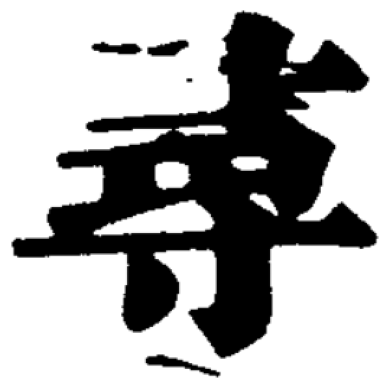

In [3]:
plt.imshow(stl_to_2d('wb_2D3Dretrieval_dataset/database/26.stl'), cmap = 'gray'), plt.axis('off')

In [ ]:

stl_path = os.path.join(g_path,'database') 
stl_2d_path = os.path.join(g_path,'stl_to_2d')
if not os.path.exists(stl_2d_path):
    os.mkdir(stl_2d_path) 
index=1
num_file= len(os.listdir(stl_path))
for file in os.listdir(stl_path): 
    print(f'{index}/{num_file}')
    index+=1
    path = os.path.join(stl_path,file)
    img_2d = stl_to_2d(path)
    out_path = os.path.join(stl_2d_path,file+'.png') 
    cv2.imwrite(out_path, img_2d)


In [3]:
# Process 2d images
def process_2d(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh_2d = cv2.threshold(gray,150,255,0)
    return crop(thresh_2d)

In [4]:
stl_path = os.path.join(g_path,'database') 
stl_2d_path = os.path.join(g_path,'stl_to_2d')

In [5]:
for filename in os.listdir(stl_2d_path):
    print(filename)

0.stl.png
1.stl.png
10.stl.png
100.stl.png
101.stl.png
102.stl.png
103.stl.png
104.stl.png
105.stl.png
106.stl.png
107.stl.png
108.stl.png
109.stl.png
11.stl.png
110.stl.png
111.stl.png
112.stl.png
113.stl.png
114.stl.png
115.stl.png
116.stl.png
117.stl.png
118.stl.png
119.stl.png
12.stl.png
120.stl.png
121.stl.png
122.stl.png
123.stl.png
124.stl.png
125.stl.png
126.stl.png
127.stl.png
128.stl.png
129.stl.png
13.stl.png
130.stl.png
131.stl.png
132.stl.png
133.stl.png
134.stl.png
135.stl.png
136.stl.png
137.stl.png
138.stl.png
139.stl.png
14.stl.png
140.stl.png
141.stl.png
142.stl.png
143.stl.png
144.stl.png
145.stl.png
146.stl.png
147.stl.png
148.stl.png
149.stl.png
15.stl.png
150.stl.png
151.stl.png
152.stl.png
153.stl.png
154.stl.png
155.stl.png
156.stl.png
157.stl.png
158.stl.png
159.stl.png
16.stl.png
160.stl.png
161.stl.png
162.stl.png
163.stl.png
164.stl.png
165.stl.png
166.stl.png
167.stl.png
168.stl.png
169.stl.png
17.stl.png
170.stl.png
171.stl.png
172.stl.png
173.stl.png
174.

In [6]:
stl_2d_image = []
binary_images_stl_2d_folder = os.path.join(g_path,'stl_to_2d')
for filename in os.listdir(binary_images_stl_2d_folder):
        image_path = os.path.join(binary_images_stl_2d_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        stl_2d_image.append((filename, image))

In [7]:
stl_2d_image[0][0]

'0.stl.png'

In [8]:
stl_2d_image[0][1].shape

(256, 256)

In [10]:
# Create the label csv file
f = open("wb_2D3Dretrieval_dataset/labels_new.csv", "w") # test_hog_512.csv

queries_path =  os.path.join(g_path,'queries') 

num_queries = len(os.listdir(queries_path))
for filename in os.listdir(queries_path):
    f.write(filename + ',"' + filename.replace("png", "stl") + '"' +'\n')
f.close()

In [11]:
from skimage.metrics import structural_similarity as compare_ssim

def find_similar_ssim(img_path, stl_2d_image):
    input_image = process_2d(cv2.imread(img_path))
    binary_images_folder = stl_2d_path
    image_matches = []

    for filename, image_query in stl_2d_image:
        # Struture SSIM
        match = compare_ssim(image_query, input_image)
        image_matches.append((filename, match.max()))

    sorted_images = sorted(image_matches, key=lambda x: x[1], reverse=True)
    top_5 = [path for path, match_value in sorted_images[:5]]
    return top_5

In [12]:
stl_path = os.path.join(g_path,'database') 
stl_2d_path = os.path.join(g_path,'stl_to_2d')
num_file= len(os.listdir(stl_path))

In [13]:
f = open("wb_2D3Dretrieval_dataset/test_ssim.csv", "w")
f.write('query,label\n')
print(g_path)
queries_path =  os.path.join(g_path,'queries') 
index = 1
num_queries = len(os.listdir(queries_path))
for filename in os.listdir(queries_path):
    print(f'{index}/{num_file}')
    index+=1
    img_path = os.path.join(queries_path,filename) 
    top5 = find_similar_ssim(img_path, stl_2d_image)
    top5_tostring = ','.join([n[:-4] for n in top5])
    f.write(filename + ',"' + top5_tostring +'"'+'\n' )
f.close()

wb_2D3Dretrieval_dataset/
1/252
2/252
3/252
4/252
5/252
6/252
7/252
8/252
9/252
10/252
11/252
12/252
13/252
14/252
15/252
16/252
17/252
18/252
19/252
20/252
21/252
22/252
23/252
24/252
25/252
26/252
27/252
28/252
29/252
30/252
31/252
32/252
33/252
34/252
35/252
36/252
37/252
38/252
39/252
40/252
41/252
42/252
43/252
44/252
45/252
46/252
47/252
48/252
49/252
50/252
51/252
52/252
53/252
54/252
55/252
56/252
57/252
58/252
59/252
60/252
61/252
62/252
63/252
64/252
65/252
66/252
67/252
68/252
69/252
70/252
71/252
72/252
73/252
74/252
75/252
76/252
77/252
78/252
79/252
80/252
81/252
82/252
83/252
84/252
85/252
86/252
87/252
88/252
89/252
90/252
91/252
92/252
93/252
94/252
95/252
96/252
97/252
98/252
99/252
100/252
101/252
102/252
103/252
104/252
105/252
106/252
107/252
108/252
109/252
110/252
111/252
112/252
113/252
114/252
115/252
116/252
117/252
118/252
119/252
120/252
121/252
122/252
123/252
124/252
125/252
126/252
127/252
128/252
129/252
130/252
131/252
132/252
133/252
134/252
135/252
13

In [14]:
# Visualiza the results
img_file_name = '91.png'
img1_path = os.path.join(queries_path, img_file_name)
# In ra đường dẫn của 5 ảnh tương tự nhất
top_5 = find_similar_ssim(img1_path, stl_2d_image)
for image_path in top_5:
    print(image_path)

91.stl.png
8.stl.png
28.stl.png
96.stl.png
99.stl.png


In [15]:
# Read the sample csv
import csv
labels = {}
with open('wb_2D3Dretrieval_dataset/labels.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        labels[lines[0]] = lines[1].split(',')

In [16]:
labels

{'query': ['label'],
 '0.png': ['0.stl', '17.stl', '70.stl', '110.stl', '130.stl'],
 '1.png': ['1.stl', '13.stl', '19.stl', '223.stl', '119.stl'],
 '10.png': ['10.stl', '155.stl', '237.stl', '75.stl', '15.stl'],
 '100.png': ['100.stl', '72.stl', '216.stl', '127.stl', '55.stl'],
 '101.png': ['101.stl', '134.stl', '248.stl', '31.stl', '199.stl'],
 '102.png': ['102.stl', '23.stl', '91.stl', '100.stl', '58.stl'],
 '103.png': ['103.stl', '19.stl', '218.stl', '141.stl', '214.stl'],
 '104.png': ['104.stl', '116.stl', '118.stl', '150.stl', '186.stl'],
 '105.png': ['105.stl', '68.stl', '131.stl', '201.stl', '176.stl'],
 '106.png': ['106.stl', '223.stl', '59.stl', '69.stl', '133.stl'],
 '107.png': ['107.stl', '15.stl', '111.stl', '221.stl', '99.stl'],
 '108.png': ['108.stl', '136.stl', '163.stl', '138.stl', '74.stl'],
 '109.png': ['109.stl', '197.stl', '38.stl', '249.stl', '22.stl'],
 '11.png': ['11.stl', '161.stl', '154.stl', '124.stl', '117.stl'],
 '110.png': ['110.stl', '82.stl', '172.stl', '

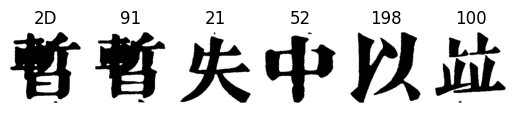

In [17]:
# Result from sample csv
csv_imgs = labels[img_file_name]
img2d = [cv2.imread(os.path.join(stl_2d_path,p+ '.png')) for p in csv_imgs]
plt.subplot(161),plt.imshow(process_2d(cv2.imread(img1_path)),cmap = 'gray'),plt.title('2D')
plt.axis('off')
plt.subplot(162),plt.imshow(img2d[0]),plt.title(csv_imgs[0][:-4])
plt.axis('off')
plt.subplot(163),plt.imshow(img2d[1]),plt.title(csv_imgs[1][:-4])
plt.axis('off')
plt.subplot(164),plt.imshow(img2d[2]),plt.title(csv_imgs[2][:-4])
plt.axis('off')
plt.subplot(165), plt.imshow(img2d[3]),plt.title(csv_imgs[3][:-4])
plt.axis('off')
plt.subplot(166),plt.imshow(img2d[4]),plt.title(csv_imgs[4][:-4])
plt.axis('off')
plt.show()

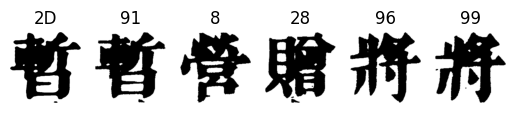

In [18]:
# Final results
img2d = [cv2.imread(os.path.join(stl_2d_path,p)) for p in top_5]
plt.subplot(161),plt.imshow(process_2d(cv2.imread(img1_path)),cmap = 'gray'),plt.title('2D')
plt.axis('off')
plt.subplot(162),plt.imshow(img2d[0]),plt.title(top_5[0][:-8])
plt.axis('off')
plt.subplot(163),plt.imshow(img2d[1]),plt.title(top_5[1][:-8])
plt.axis('off')
plt.subplot(164),plt.imshow(img2d[2]),plt.title(top_5[2][:-8])
plt.axis('off')
plt.subplot(165), plt.imshow(img2d[3]),plt.title(top_5[3][:-8])
plt.axis('off')
plt.subplot(166),plt.imshow(img2d[4]),plt.title(top_5[4][:-8])
plt.axis('off')
plt.show()